 <h1 style="text-align: center; color: RED">EKSİK DEĞER ANALİZİ</h1>

Gözlemlerde eksiklik olması durumunu ifade eder.
![Test](datasets/5.png) 

Eksik değer problemi 3 yöntem ile çözülebilir:

* Silme

* Değer Atama Yöntemleri

* Tahmine Dayalı Yöntemler

Eksik veri ile çalışırken göz önünde bulundurulması gereken önemli konulardan biri eksik verilerin rassallığıdır.Yani eksik verinin rastgele çıkıp çıkmadığını dikkate almamız gerekir.

<span style="color: blue; font-weight: bold;">1- EKSİK DEĞERLERİ YAKALAMA</span>

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno #eksik değerler için kullanılan bir kütüphane
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

In [11]:
#Görsel ayaralama için
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [13]:
def load_application_train():
    data = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\6.Feature Engineering\\datasets\\application_train.csv")
    return data

In [15]:
def load():
    data = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\6.Feature Engineering\\datasets\\titanic.csv")
    return data
    

In [17]:
df1 = load_application_train()
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [19]:
df2 = load()
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [21]:
#Eksik değer var mı yok mu sorgusu?
df2.isnull().values.any()

True

In [27]:
df2.isnull().sum()#eksik değer sayısı

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df2.notnull().sum()#dolu değişken sayısı

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [35]:
df2.isnull().sum().sum()#veri setindeki toplam eksik değer sayısı

866

In [41]:
df2[df2.isnull().any(axis=1)]#eksik değer olan her satırı getirii

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.458,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000,0,2,347742,11.133,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000,1,0,237736,30.071,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000,1,5,347082,31.275,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000,0,0,350406,7.854,NaN,S


In [43]:
df2[df2.notnull().all(axis=1)]# tam olan gözlem birimi

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000,0,0,17463,51.862,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000,1,1,PP 9549,16.700,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.000,0,0,113783,26.550,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000,0,0,248698,13.000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000,0,0,113788,35.500,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000,3,2,19950,263.000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000,1,0,PC 17572,76.729,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.000,0,1,113509,61.979,B30,C


In [47]:
#Büyükten küçüğe sıralama
df2.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [51]:
#Eksik değerler veri setinin yüzde kaçını oluşturuypr
(df2.isnull().sum() / df2.shape[0])*100

PassengerId    0.000
Survived       0.000
Pclass         0.000
Name           0.000
Sex            0.000
Age           19.865
SibSp          0.000
Parch          0.000
Ticket         0.000
Fare           0.000
Cabin         77.104
Embarked       0.224
dtype: float64

In [55]:
na_cols = [col for col in df2.columns if df2[col].isnull().sum()>0]#sadece ekisk değer olan değişkenler
na_cols

['Age', 'Cabin', 'Embarked']

In [63]:
#Tüm sürecin fonksiyonlaştırılması
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [61]:
missing_values_table(df2, na_name=True)

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


['Age', 'Cabin', 'Embarked']

<span style="color: blue; font-weight: bold;">2- EKSİK DEĞER PROBLEMİNİ ÇÖZME</span>

* Eğer ağaca dayalı yöntemler kullanılıyorsa eksik değerlerin etkisi göz ardı edilebilir.

**1- Eksik Değerleri Silme**

In [ ]:
df2.dropna()# silme işini yaparken dikkatli olmamız gerekir veri kaybı biizm için problem olabilir.

**2- Basit Atama Yöntemleri İle Doldurma**

In [ ]:
df2['Age'].fillna(df2['Age'].mean()) # yaş değişkenini ortalma ile doldurabiliriz

In [ ]:
df2['Age'].fillna(df2['Age'].median()) # medyan ile doldurma

In [73]:
dff = df2.apply(lambda x: x.fillna(x.mean) if x.dtype!='O' else x, axis=0).head()#veri setindeki tüm sayısal değişkenleri ortalamaları ile doldurdu

In [77]:
df2.isnull().sum() #gördüğümüz üzere sadece kategorik değişkenlerde eksik değerler kaldı

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Kategorik değişkenleri doldururken o değişkenin modunu kullanabibilir. Yani en cok tekrar eden değer ile eksik değerleri doldurabiliriz.Ya da özel belirlediğimiz bir değer ile de doldurabiliriz.

In [ ]:
df2['Embarked'].fillna(df2['Embarked'].mode()[0])

In [ ]:
df2['Embarked'].fillna('missing')

In [ ]:
#hızlı bir şekilde doldurma
df2.apply(lambda x: x.fillna(x.mode()[0]) (if x.dtype=='O' and len(x.nunique()<=10) else x, axis=0)

**3- Kategorik Değişken Kırılımında Değer Atama**

In [87]:
df2.groupby('Sex')['Age'].mean()#cinsiyete göre kırılım yaptığımızda ortalamaların değiştiğini görüyoruz.

Sex
female   27.916
male     30.727
Name: Age, dtype: float64

In [ ]:
df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))#eksik değerleri cinsiyet krılımında doldurduk

In [ ]:
#başka yöntem
 df.loc[(df['Age'].isnull()) & (df['Sex']=='female'), 'Age'] = df.groupby('Sex')['Age'].mean()['female']

* Yukarıdaki kod parçasında loc ile cinsiyeti kadın olan ve yaş bilgisi eksik olan gözlemleri sectik. Daha sonra bu eksik değerleri cinsiyet kırılımında alıdığımız kadınların ortalamasına eşitledik.

In [ ]:
#Erkekler için
df.loc[(df['Age'].isnull()) & (df['Sex']=='male'), 'Age'] = df.groupby('Sex')['Age'].mean()['male']

**4- Tahmine Dayalı Değer Atama**

Eksiklik olan değişkeni bağımlı değişken diğer değişkenleri bağımsız değişken olarak kabul edip bir modelleme işlemi gerçekleştiricez.

In [94]:
#titanic veri setini tekrardan okuttuk
df2 = load()
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [96]:
def grab_col_names(dataframe, cat_th=10, car_th=20):#parametrelerin ön tanımlı değerlerini burda belirttik
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal degiskenlerin isimlerini verir.--
    Parameters
    ----------
    dataframe: dataframa
        degisken isimleri alınmak istenen dataframedir.
    cat_th: int, float
        numerik fakat kategorik olan degiskenler için sınıf eşik degeri
    car_th: int, float
        kategorik fakat kardinal degiskenler icin sınıf esik degeri

    Returns
    -------
    cat_cols: list
        kategorik degisken listesi
    num_cols: list
        numerik degisken listesi
    cat_but_car: list
        kategorik gorunumlu kardinal degisken listesi
    Notes
    -------
    cat_cols+num_cols+cat_but_car=toplam degisken sayısı
    num_but_cat cat_cols'un içerisindedir.
    Return olan 3 liste toplamı degisken sayısına eşittir: cat_cols +num_cols+cat_but_car
    """
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category', 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes in ['int64', 'float64'] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category'] and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes  in ['int64', 'float64']] #bu sayısal değişkenleri verir
    num_cols = [col for col in num_cols if col not in cat_cols] 

    print(f'Observetions: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


In [98]:
cat_cols, num_cols, cat_but_car = grab_col_names(df2)

Observetions: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [100]:
cat_cols

['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp', 'Parch']

In [102]:
num_cols = [col for col in num_cols if col not in 'PassengerId']

In [104]:
num_cols

['Age', 'Fare']

* Modelleme yapabilmem için kategorik değişkenlere one hot encoder yöntemini uygulamamız gerekir. Yani 1 O olarak ifade etmemiz gerekir.

In [110]:
dff = pd.get_dummies(df2[cat_cols + num_cols], drop_first=True)# bütün kategorik değişkenleri 1 O olarak dönüştürecek

In [112]:
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,22.000,7.250,True,False,True
1,1,1,1,0,38.000,71.283,False,False,False
2,1,3,0,0,26.000,7.925,False,False,True
3,1,1,1,0,35.000,53.100,False,False,True
4,0,3,0,0,35.000,8.050,True,False,True
5,0,3,0,0,NaN,8.458,True,True,False
6,0,1,0,0,54.000,51.862,True,False,True
7,0,3,3,1,2.000,21.075,True,False,True
8,1,3,0,2,27.000,11.133,False,False,True
9,1,2,1,0,14.000,30.071,False,False,False


* Bir diğer amacımız modelleme yapabilmek için değişkenlerin standartlaştırılması gerekmektedir.

In [117]:
scaler=MinMaxScaler()

In [121]:
dff = pd.DataFrame(scaler.fit_transform(dff), columns = dff.columns)
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000
5,0.000,1.000,0.000,0.000,NaN,0.017,1.000,1.000,0.000
6,0.000,0.000,0.000,0.000,0.673,0.101,1.000,0.000,1.000
7,0.000,1.000,0.375,0.167,0.020,0.041,1.000,0.000,1.000
8,1.000,1.000,0.000,0.333,0.334,0.022,0.000,0.000,1.000
9,1.000,0.500,0.125,0.000,0.171,0.059,0.000,0.000,0.000


* Knn ile yani en yakın k komşu yöntemi ile eksik değerleri tahmin edecez.

In [129]:
imputer = KNNImputer(n_neighbors = 5)

In [132]:
dff = pd.DataFrame(imputer.fit_transform(dff), columns = dff.columns)

In [134]:
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,1.000,0.125,0.000,0.271,0.014,1.000,0.000,1.000
1,1.000,0.000,0.125,0.000,0.472,0.139,0.000,0.000,0.000
2,1.000,1.000,0.000,0.000,0.321,0.015,0.000,0.000,1.000
3,1.000,0.000,0.125,0.000,0.435,0.104,0.000,0.000,1.000
4,0.000,1.000,0.000,0.000,0.435,0.016,1.000,0.000,1.000
5,0.000,1.000,0.000,0.000,0.595,0.017,1.000,1.000,0.000
6,0.000,0.000,0.000,0.000,0.673,0.101,1.000,0.000,1.000
7,0.000,1.000,0.375,0.167,0.020,0.041,1.000,0.000,1.000
8,1.000,1.000,0.000,0.333,0.334,0.022,0.000,0.000,1.000
9,1.000,0.500,0.125,0.000,0.171,0.059,0.000,0.000,0.000


In [138]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns = dff.columns) #normal değerleri elde ettik

In [140]:
dff

,Survived,Pclass,SibSp,Parch,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.000,3.000,1.000,0.000,22.000,7.250,1.000,0.000,1.000
1,1.000,1.000,1.000,0.000,38.000,71.283,0.000,0.000,0.000
2,1.000,3.000,0.000,0.000,26.000,7.925,0.000,0.000,1.000
3,1.000,1.000,1.000,0.000,35.000,53.100,0.000,0.000,1.000
4,0.000,3.000,0.000,0.000,35.000,8.050,1.000,0.000,1.000
5,0.000,3.000,0.000,0.000,47.800,8.458,1.000,1.000,0.000
6,0.000,1.000,0.000,0.000,54.000,51.862,1.000,0.000,1.000
7,0.000,3.000,3.000,1.000,2.000,21.075,1.000,0.000,1.000
8,1.000,3.000,0.000,2.000,27.000,11.133,0.000,0.000,1.000
9,1.000,2.000,1.000,0.000,14.000,30.071,0.000,0.000,0.000


In [142]:
#Boş olan değerleri doldurduk şimdi bu durumu gözlemleyelim
df2['age_imputed_knn'] = dff['Age']

In [144]:
df2.loc[df2['Age'].isnull(),['Age','age_imputed_knn']]# tahmin edilen değerleri inceledik

,Age,age_imputed_knn
5,NaN,47.800
17,NaN,37.600
19,NaN,12.200
26,NaN,32.800
28,NaN,17.600
29,NaN,24.400
31,NaN,29.600
32,NaN,17.600
36,NaN,21.800
42,NaN,28.700


<span style="color: blue; font-weight: bold;">3- EKSİK VERİLERİN YAPISINI İNCELEMEK</span>

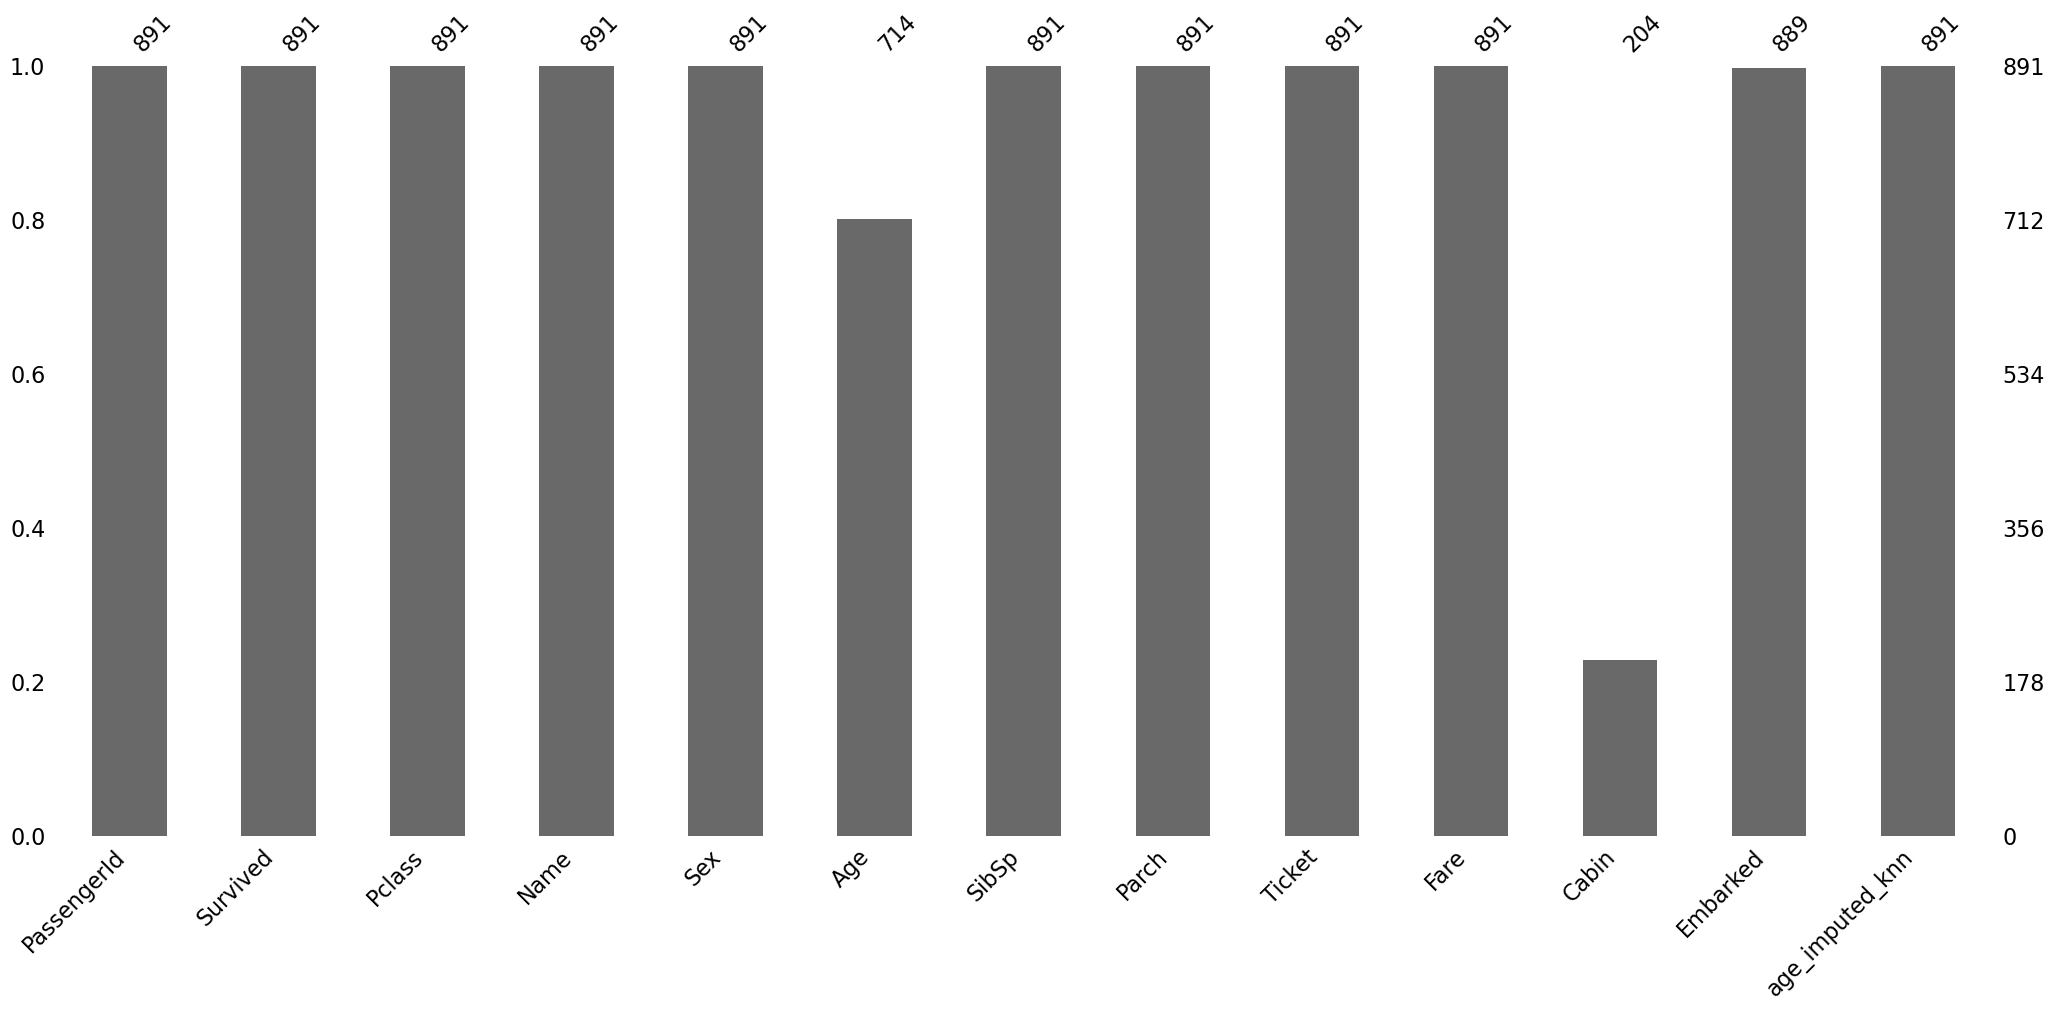

In [172]:
#Eksik değerleri grafik ile inceleme
msno.bar(df2)# veri setindeki tam olan gözlem sayılarını verir.
plt.show()

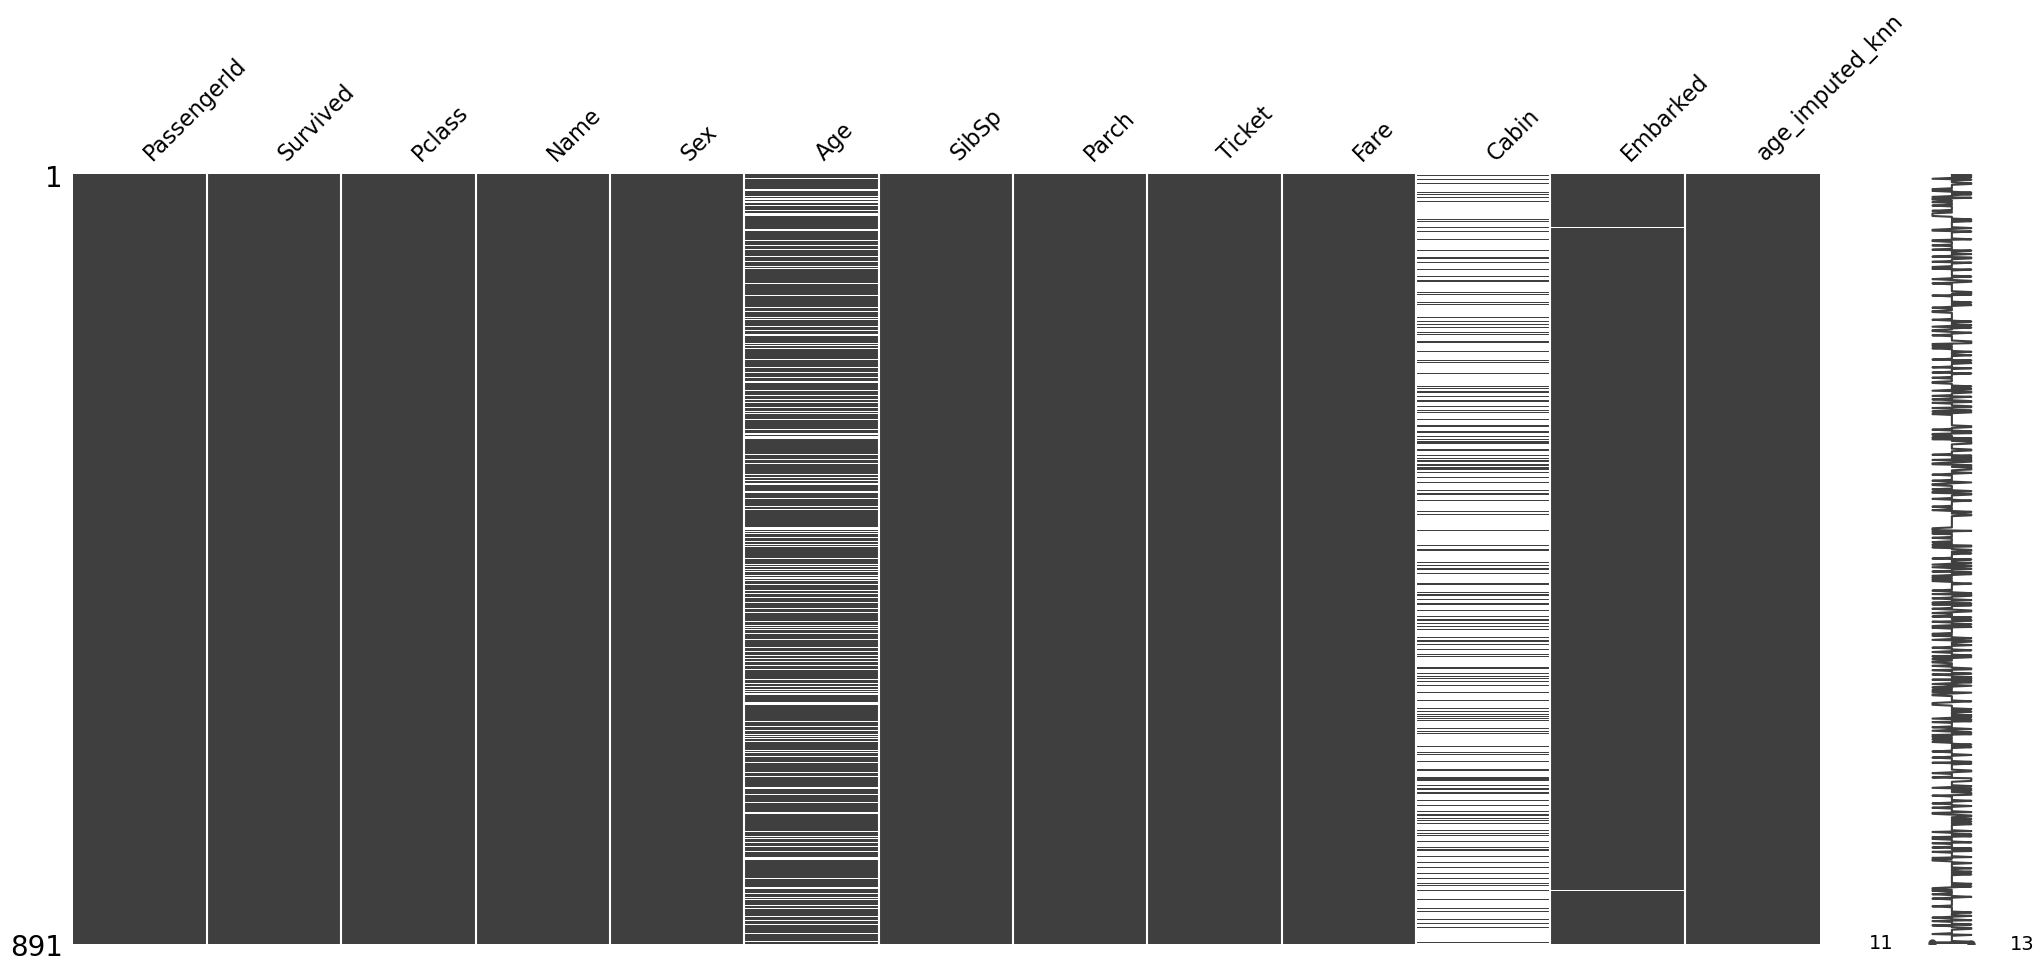

In [174]:
#Değişkenlerdeki eksikliklerin bir arada çıkıp çıkmama durmunu incelememizi sağlar.
msno.matrix(df2)
plt.show()

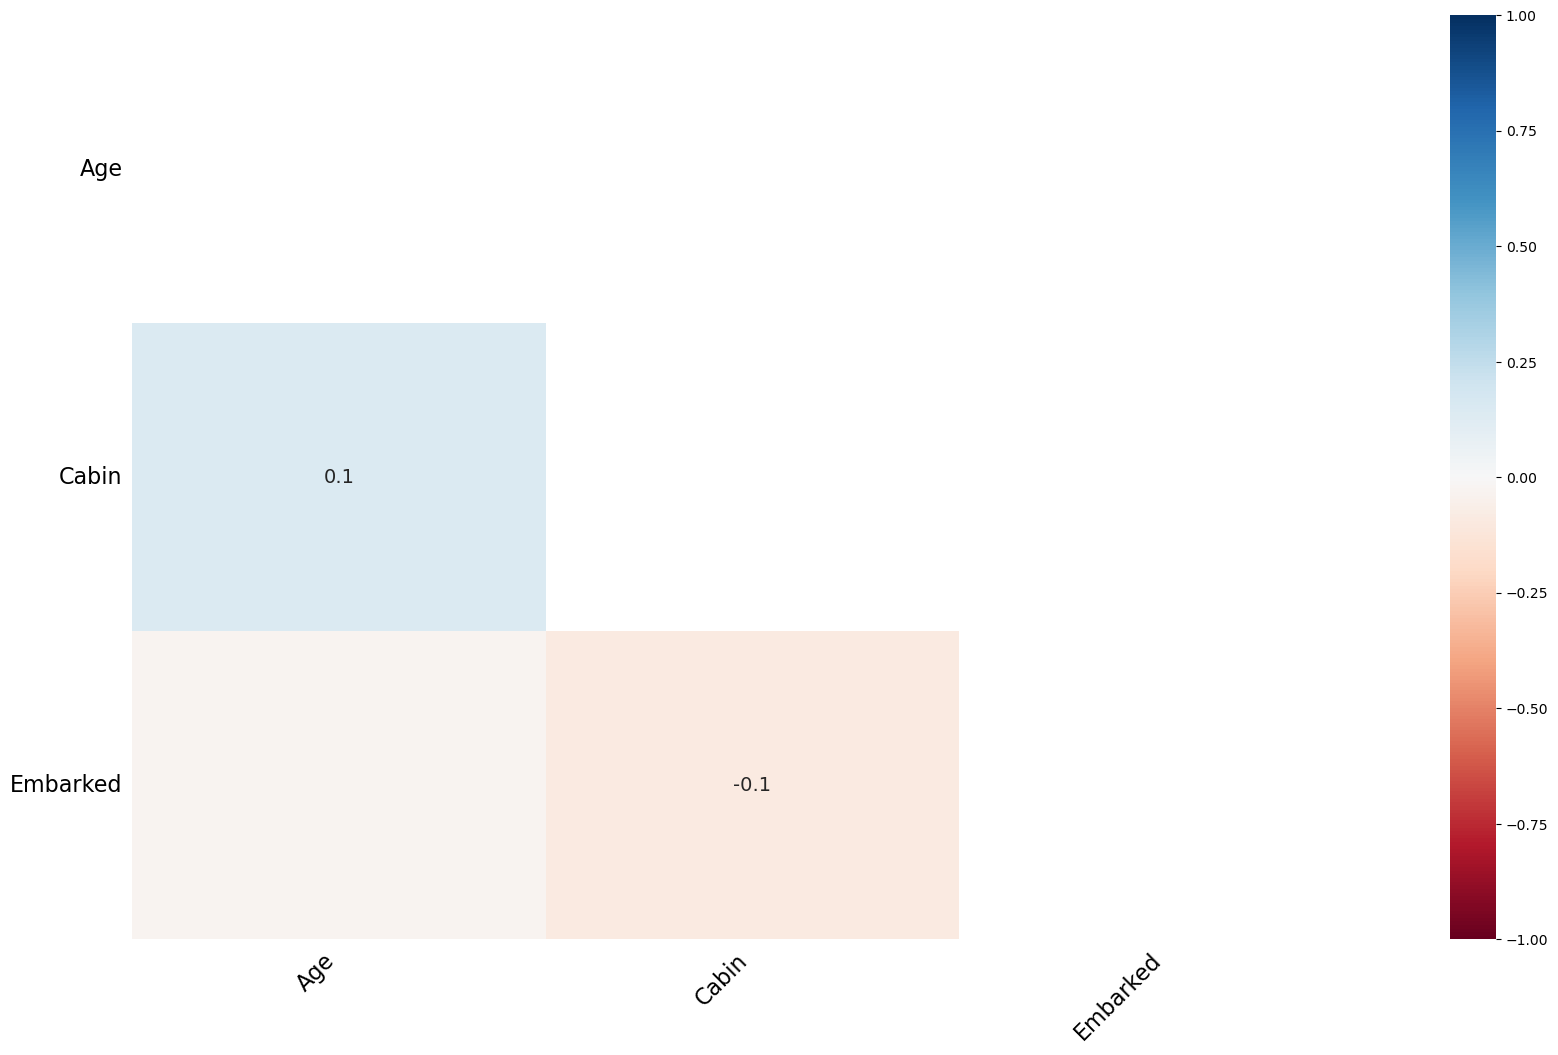

In [176]:
#Eksik değerlerin birlikte oluşup oluşmadığı durumunu yani korelasyonunu incelememizi sağlar.
#Satırlar ve sütunlar arasında eksikliklerin birlikte oluşup oluşmadığını gösterir.
msno.heatmap(df2)
plt.show()


<span style="color: blue; font-weight: bold;">4- EKSİK DEĞERLERİN BAĞIMLI DEĞİŞKEN İLE ANALİZİ</span>

In [182]:
na_cols = missing_values_table(df2, na_name=True) #eksik değerleri yakaladığımız fonksiyon

          n_miss  ratio
Cabin        687 77.100
Age          177 19.870
Embarked       2  0.220


In [184]:
na_cols

['Age', 'Cabin', 'Embarked']

In [186]:
#Eksik değerlerin hedef değişken (target) üzerindeki etkisini analiz etmek.
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)#eksiklik olan değerelere 1 diğerlerine 0 yazacak

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns #içerisinde NA ifadesi olan sutunları getiricek
               #[col for col in temp_df.columns if "_NA_" in col]
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")




In [188]:
missing_vs_target(df2, "Survived", na_cols)

             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.406    714
1                  0.294    177


               TARGET_MEAN  Count
Cabin_NA_FLAG                    
0                    0.667    204
1                    0.300    687


                  TARGET_MEAN  Count
Embarked_NA_FLAG                    
0                       0.382    889
1                       1.000      2


